In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# hdu = fits.open('detector_testing_data/InfImg_d3200x2048x0050_b01_e01_i01_g01_d00_r50_t0755953568718ms.fits')
hdu = fits.open('detector_testing_data/InfImg_d2048x2048x0070_b01_e01_i01_g01_d00_r70_t0755954339929ms.fits')



In [3]:
hdu[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
EXTNAME = 'PRIMARY '           / Name of extension                              
NEXTEND =                    3 / Number of standard extensions                  
SIMDATA =                    F / Simulated data                                 
SCIDATA =                    T / Science data                                   
TELESCOP= 'NASA Pandora'       / Telescope                                      
CAMERAID= 'H2rgCam '           / ID of camera used in acquisition.              
INSTRMNT= 'NIRDA   '           / Instrument                                     
CREATOR = 'Pandora MOC'        / Creator of this product                        
CRSOFTV = 'v1.05   '        

In [4]:
hdu.info()
hdu[1].shape

Filename: detector_testing_data/InfImg_d2048x2048x0070_b01_e01_i01_g01_d00_r70_t0755954339929ms.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      48   ()      
  1  SCIENCE       1 CompImageHDU     55   (2048, 2048, 70)   int16   
  2  TEMP_TIME     1 TableHDU        12   70R x 1C   [I194]   


(70, 2048, 2048)

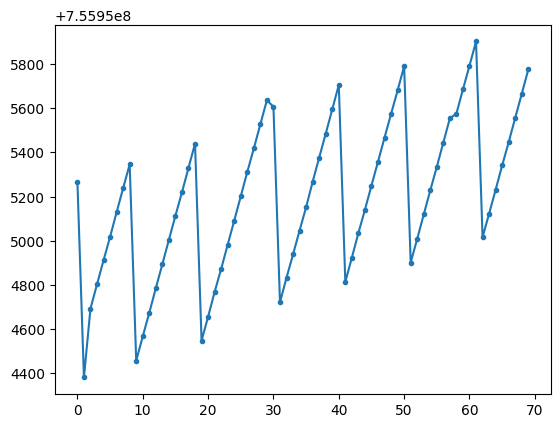

In [5]:
from astropy.table import Table
time = Table(hdu[2].data)['FrameAcquisitionTime_ms'].value
# len(time)
plt.plot(time, marker='.')

uint16
int32
(2048, 2048)


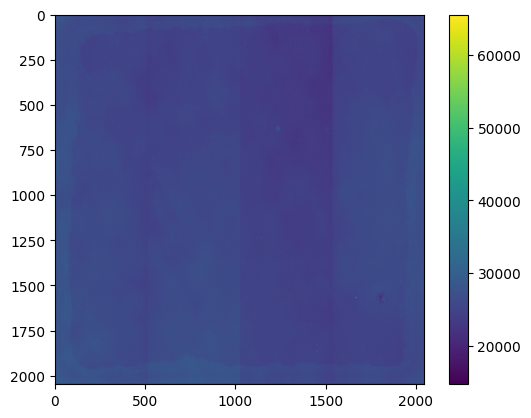

(2048, 2048)


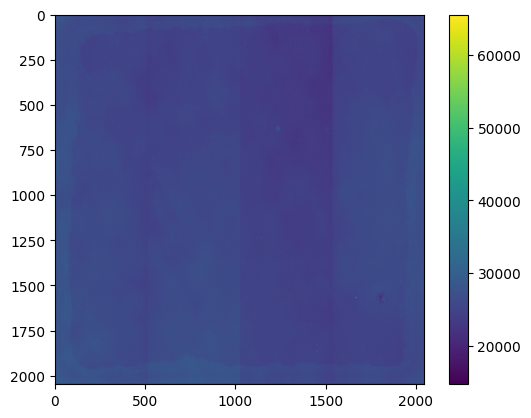

In [6]:
data = hdu[1].data.copy()
data32 = hdu[1].data.copy().astype(np.int32)
print(data.dtype)
print(data32.dtype)

print(data[25,:,:].shape)
plt.imshow(data[0,:,:])
plt.colorbar()
plt.show()

print(data32[25,:,:].shape)
plt.imshow(data32[0,:,:])
plt.colorbar()
plt.show()

[Text(0.5, 0, 'Detector Column'),
 Text(0, 0.5, 'Detector Row'),
 Text(0.5, 1.0, 'Pixels where Detector Saturates')]

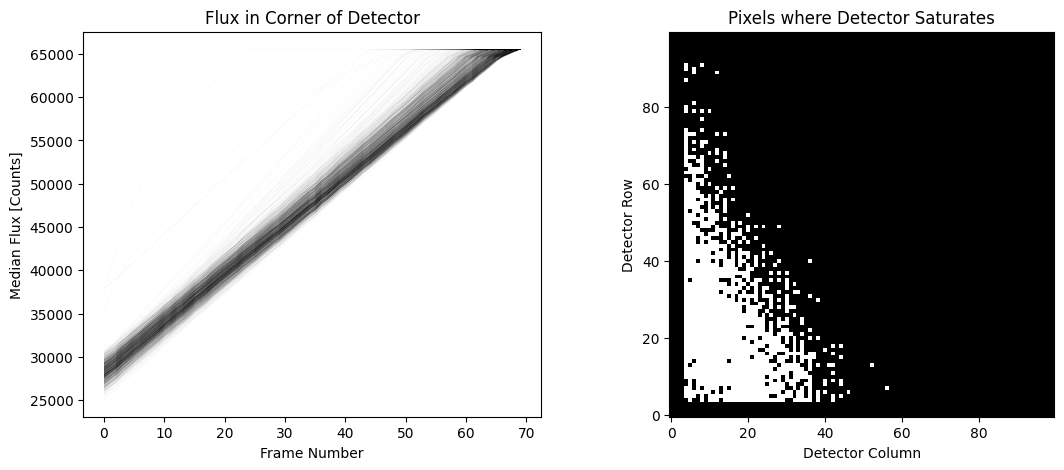

In [7]:
f = data
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
sat_aper = (f[:, :100, :100] == f.max()).any(axis=0)
ax[0].plot(f[:, :100, :100][:, sat_aper], c="k", alpha=0.1, lw=0.1)
ax[0].set(
    xlabel="Frame Number",
    ylabel="Median Flux [Counts]",
    title="Flux in Corner of Detector",
)
ax[1].imshow(sat_aper, origin="lower", cmap="Greys_r")
ax[1].set(
    xlabel="Detector Column",
    ylabel="Detector Row",
    title="Pixels where Detector Saturates",
)

In [157]:
hdu[1].shape

(70, 2048, 2048)

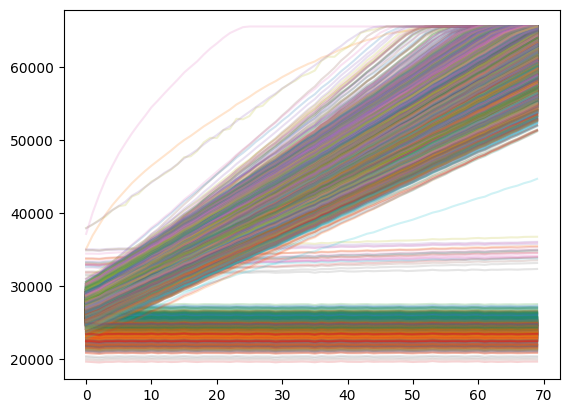

In [8]:
xrange = range(100)
yrange = range(100)

# for i in (xrange):
#     for j in (yrange):
#         plt.plot(data[:,i,j], alpha=0.1)

# plt.show()

for i in (xrange):
    for j in (yrange):
        plt.plot(data32[:,i,j], alpha=0.2)
# plt.yscale('log')
plt.show()


In [103]:
y = data[:,i,j]

<class 'astropy.modeling.powerlaws.BrokenPowerLaw1D'>
Name: BrokenPowerLaw1D
N_inputs: 1
N_outputs: 1
Fittable parameters: ('amplitude', 'x_break', 'alpha_1', 'alpha_2')

In [120]:
y

array([25907, 25945, 25985, 26114, 26187, 26308, 26394, 26502, 26553,
       26642, 26726, 26822, 26926, 27046, 27083, 27243, 27275, 27409,
       27430, 27535, 27604, 27696, 27791, 27899, 27964, 28036, 28100,
       28182, 28210, 28294, 28410, 28512, 28617, 28701, 28827, 28897,
       28935, 29047, 29134, 29408, 29514, 29656, 29777, 29914, 30044,
       30223, 30275, 30373, 30428, 30586, 30776, 30818, 30955, 31064,
       31163, 31261, 31374, 31442, 31549, 31706, 31764, 31820, 31942,
       32012, 32188, 32267, 32384, 32446, 32514, 32647], dtype=uint16)

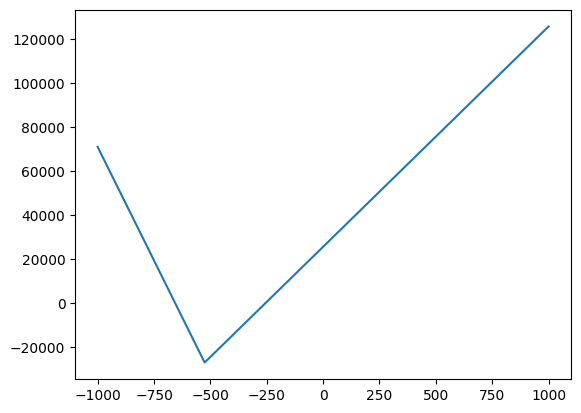

In [134]:
x3 =  np.linspace(-1000, 1000, 1000)
plt.plot(x3, piecewise_linear(x3, *p))

[50. 50.  1.  2.]
[[6.27630827e-27 9.41446241e-27 9.32124991e-29 9.32124990e-29]
 [9.41446241e-27 1.56907707e-26 1.86424998e-28 9.32124990e-29]
 [9.32124991e-29 1.86424998e-28 3.69121496e-30 4.23338457e-45]
 [9.32124990e-29 9.32124990e-29 4.18012384e-45 3.69121496e-30]]


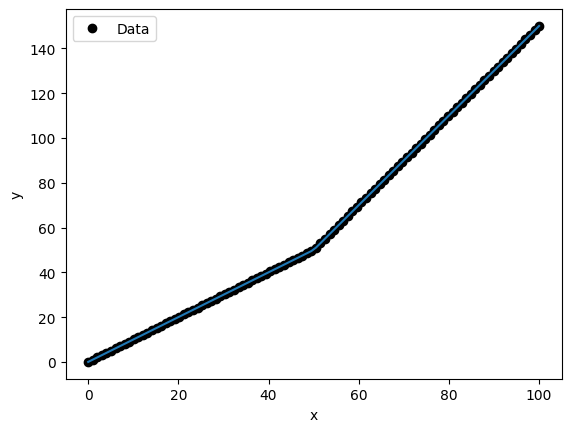

In [140]:
xfake = np.linspace(0,100, 100)
yfake = np.append(xfake[:50], xfake[50:]*2-50)
# plt.plot(xfake, yfake)
# plt.show()

# breakpoint, y intercept, slope1, slope2
p , e = optimize.curve_fit(piecewise_linear, xfake, yfake, bounds=([-np.inf, -np.inf, 0, 0], [np.inf, np.inf, np.inf, np.inf]))

print(p)
print(e)

plt.figure()
plt.plot(xfake, yfake, 'ko', label='Data')
plt.plot(xfake, piecewise_linear(xfake, *p))

# plt.plot(x, bpl(x), 'b-', label='Simulation Model')
# plt.plot(x, fitted_line(x), 'k-', label='Fitted Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [16]:
sat_aper

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

[1.49029086e-01 3.37266747e+04 3.27229666e+04 5.78667447e+02]
[[ 9.73933783e+12  5.63583945e+15 -2.10069184e+18 -6.70606781e+07]
 [ 5.63583945e+15  3.26127781e+18 -1.21560235e+21 -3.88058601e+10]
 [-2.10069184e+18 -1.21560235e+21  4.53101255e+23  1.44644144e+13]
 [-6.70606781e+07 -3.88058601e+10  1.44644144e+13  9.52091411e+02]]


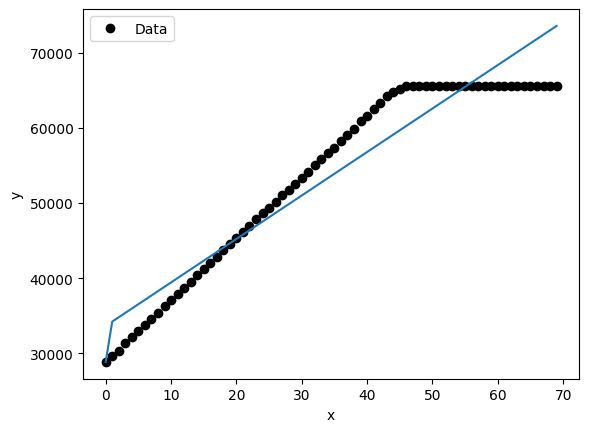

In [25]:
from scipy import optimize

def piecewise_linear(x, x0, y0, k1, k2):
    # x array, 
    # x0 = breakpoint location
    # y0 =  y intercept, 
    # k1, k2 = slope 1, slope2
    return np.piecewise(x, [x < x0], [lambda x:k1*x + y0-k1*x0, lambda x:k2*x + y0-k2*x0])

y = f[:, :100, :100][:, sat_aper][:,0]
x = np.arange(len(y))

p , e = optimize.curve_fit(piecewise_linear, x, y, bounds=([0, -np.inf, 0, 0], [np.inf, np.inf, np.inf, np.inf]))

print(p)
print(e)

xd = np.linspace(0, 15, 100)
plt.figure()
plt.plot(x, y, 'ko', label='Data')
plt.plot(x, piecewise_linear(x, *p))
plt.plot()


# plt.plot(x, bpl(x), 'b-', label='Simulation Model')
# plt.plot(x, fitted_line(x), 'k-', label='Fitted Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

i = 1000; j=1000
# time = Table(hdu[2].data)['FrameAcquisitionTime_ms'].value
# x = time - time[0]
y = data32[:,i,j]
x = np.arange(len(y))

# define a model for a line
# line_orig = models.Linear1D(slope=1.0, intercept=y[0])
bpl = 


# initialize a linear fitter
# fit = fitting.LinearLSQFitter()
fit = fitting.LevMarLSQFitter()

# initialize a linear model
# line_init = models.Linear1D()
line_init = bpl

# fit the data with the fitter
fitted_line = fit(line_init, x, y)

# plot
plt.figure()
plt.plot(x, y, 'ko', label='Data')
plt.plot(x, line_init(x), 'b-', label='Simulation Model')
plt.plot(x, fitted_line(x), 'k-', label='Fitted Model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

/opt/anaconda3/envs/pandora/lib/python3.9/site-packages/astropy/modeling/powerlaws.py:128: RuntimeWarning: divide by zero encountered in power
  return amplitude * xx ** (-alpha)


NonFiniteValueError: Objective function has encountered a non-finite value, this will cause the fit to fail!
Please remove non-finite values from your input data before fitting to avoid this error.

In [115]:
fitted_line(1.23)

25771.586896684443